   S No Customer Name Customer ID Product Category Product Name   Region  \
0     1         Meena   CUST31122            Books         Rice  Central   
1     2         Ankit   CUST22917           Beauty     Lipstick     East   
2     3          Amit   CUST70643          Grocery        Shoes    South   
3     4         Vikas   CUST48075           Sports        Mixer     West   
4     5         Priya   CUST71853           Sports         Rice  Central   

        State       City  Gender Payment Method  Quantity  Rate  \
0          UP  Ahmedabad  Female    Net Banking        10  1818   
1  Tamil Nadu     Jaipur  Female    Net Banking         8  3735   
2  Tamil Nadu  Ahmedabad    Male         Wallet         7   850   
3   Rajasthan   Amritsar  Female            COD         4  2220   
4          UP  Bengaluru    Male    Credit Card         1  1625   

   Purchase Cost  Amount  Profit  Order Date  
0           8685   18180    9495   6/21/2023  
1           8579   29880   21301  10/14/2022  

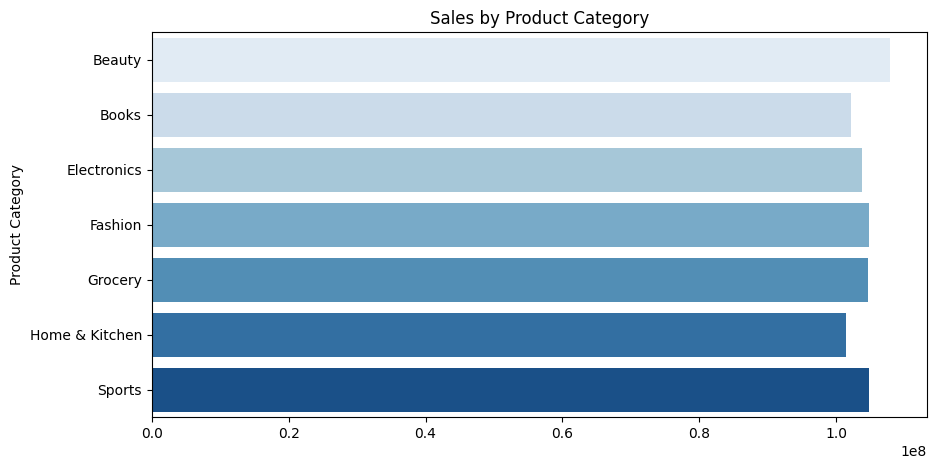

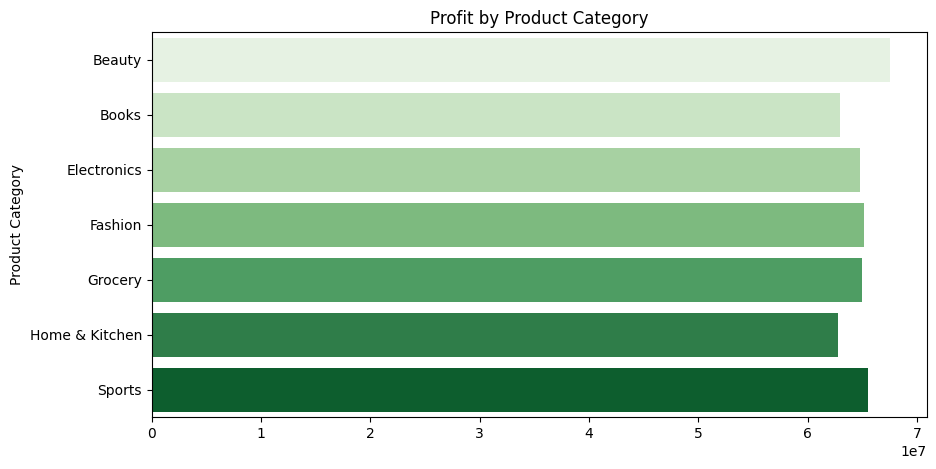

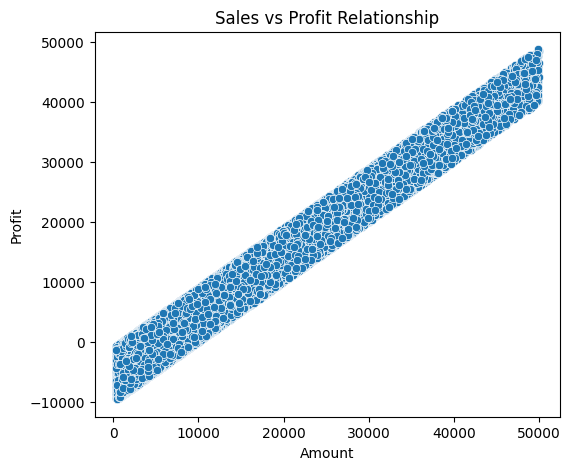

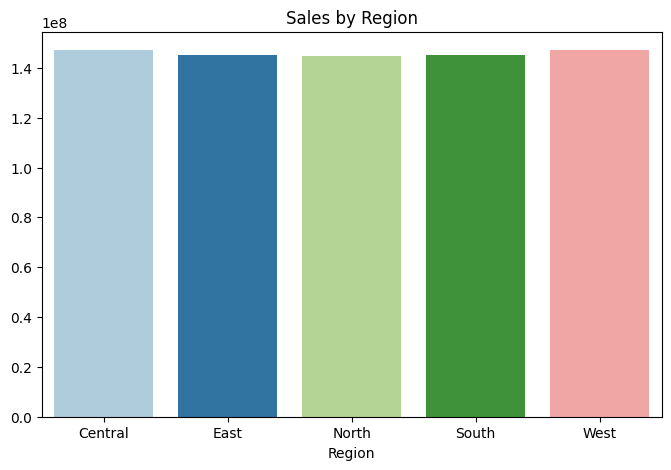

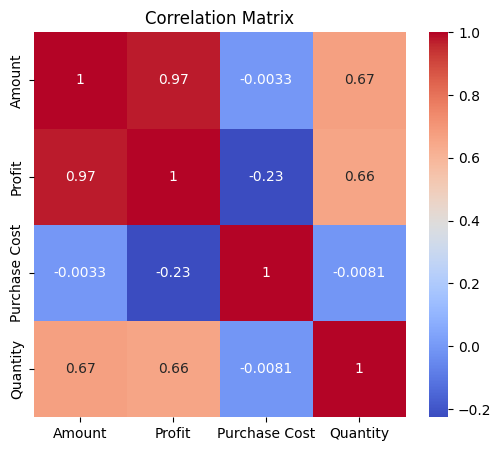

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA
df = pd.read_csv("E-commerce_sales_data.csv")

print(df.head())
print("\nDataset Info:\n")
print(df.info())

# ------------------ BASIC METRICS ------------------

print("QUESTION 1: TOTAL SALES")
total_sales = df['Amount'].sum()
print("Total Sales:", total_sales)

print("QUESTION 2: TOTAL PROFIT")
total_profit = df['Profit'].sum()
print("Total Profit:", total_profit)

print("QUESTION 3: OVERALL PROFIT MARGIN")
profit_margin = (total_profit / total_sales) * 100
print("Profit Margin %:", profit_margin)

print("QUESTION 4: AVERAGE ORDER VALUE")
avg_order_value = df['Amount'].mean()
print("Average Order Value:", avg_order_value)

# ------------------ CATEGORY ANALYSIS ------------------

print("QUESTION 5: SALES BY CATEGORY")
sales_by_category = df.groupby('Product Category')['Amount'].sum()
print(sales_by_category.sort_values(ascending=False))

print("QUESTION 6: TOP 10 PRODUCTS BY SALES")
top_sales_products = df.groupby('Product Name')['Amount'].sum().sort_values(ascending=False).head(10)
print(top_sales_products)

print("QUESTION 7: TOP 10 PRODUCTS BY PROFIT")
top_profit_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
print(top_profit_products)

print("QUESTION 8: LOSS-MAKING PRODUCTS")
loss_products = df.groupby('Product Name')['Profit'].sum()
print(loss_products[loss_products < 0])

# ------------------ REGION ANALYSIS ------------------

print("QUESTION 9: SALES BY REGION")
region_sales = df.groupby('Region')['Amount'].sum()
print(region_sales.sort_values(ascending=False))

print("QUESTION 10: LOSS-MAKING REGIONS")
region_loss = df.groupby('Region')['Profit'].sum()
print(region_loss[region_loss < 0])

# ------------------ DEMOGRAPHIC ------------------

print("QUESTION 11: SALES BY GENDER")
print(df.groupby('Gender')['Amount'].sum())

print("QUESTION 12: PROFIT BY GENDER")
print(df.groupby('Gender')['Profit'].sum())

print("QUESTION 13: PAYMENT METHOD USAGE")
print(df['Payment Method'].value_counts())

print("QUESTION 14: PROFIT BY PAYMENT METHOD")
print(df.groupby('Payment Method')['Profit'].sum())

print("QUESTION 15: AVERAGE QUANTITY PER ORDER")
print(df['Quantity'].mean())

# ------------------ VISUALIZATION ------------------

# 1 Sales by Category
plt.figure(figsize=(10,5))
sns.barplot(x=sales_by_category.values, y=sales_by_category.index, hue=sales_by_category.index, palette="Blues", legend=False)
plt.title("Sales by Product Category")
plt.show()

# 2 Profit by Category
profit_by_category = df.groupby('Product Category')['Profit'].sum()
plt.figure(figsize=(10,5))
sns.barplot(x=profit_by_category.values, y=profit_by_category.index, hue=profit_by_category.index, palette="Greens", legend=False)
plt.title("Profit by Product Category")
plt.show()

# 3 Sales vs Profit Scatter
plt.figure(figsize=(6,5))
sns.scatterplot(x=df['Amount'], y=df['Profit'])
plt.title("Sales vs Profit Relationship")
plt.show()

# 4 Sales by Region
plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values, hue=region_sales.index, palette="Paired", legend=False)
plt.title("Sales by Region")
plt.show()

# 5 Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[['Amount','Profit','Purchase Cost','Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
